In [1]:
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt
from local_functions import *

# Random and not-so random graph models for canopies
We explore network models for tree-top vegetation. First, we consider lattice networks (i.e., grids) in 2, 3 or more dimensions and randomly sampled subnetworks of such lattice networks. Subsequently, we also consider random-geometric graph models in 2, 3 or more dimensions. Finally, we discuss the placement of nests (in simulations) on these networks.

## 1. Lattice networks
The command `spatial_lattice_graph(lattice=(4,6))` generates a 2d lattice of 4x6 nodes. One can change to a 3d lattice by adding another number to `lattice`. For example, `spatial_lattice_graph(lattice=(4,6,7))` gives a 3d lattice of 4x6x7 nodes. (However, for three or more dimensions, it becomes hard to visualize these spatial networks, so we will not visualize such networks here.)

Let's just look at different 2d lattices.

In [2]:
# generate two lattice networks fo different shapes
network1 = spatial_lattice_graph(lattice=(4,4))
network2 = spatial_lattice_graph(lattice=(4,6))

# for each network, get spatial positions of nodes
node_positions1 = nx.get_node_attributes(network1, 'position')
node_positions2 = nx.get_node_attributes(network2, 'position')

# make a figure
plt.figure(figsize=(8,4))

# draw networks
axis1 = plt.subplot(121)
plt.title('4x4 lattice')
nx.draw(network1, node_positions1, axis=axis1)
axis2 = plt.subplot(122)
plt.title('4x6 lattice')
nx.draw(network2, node_positions2, axis=axis2)

C:\ProgramData\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


Note that the horizontal edges can be longer or shorter than the edges in the vertical direction. At some later stage, the length of edges and the spatial position of nodes may be relevant. We can specify the size of the area of box in which the lattice is embedded using the keyword argument `box`. For example, `spatial_lattice_graph(lattice=(5,5), box=(1.0,2.0))` generates a 2d lattice of 5x5 nodes that is embedded in a rectangular patch that is twice as long in one dimension than in the other.

In [3]:
# make 3 lattice networks with specified box dimensions
network1 = spatial_lattice_graph(lattice=(5,5), box=(2,1))
network2 = spatial_lattice_graph(lattice=(5,5), box=(1,2))
network3 = spatial_lattice_graph(lattice=(5,5), box=(2,2))

# for each network, get spatial positions of nodes
node_positions1 = nx.get_node_attributes(network1, 'position')
node_positions2 = nx.get_node_attributes(network2, 'position')
node_positions3 = nx.get_node_attributes(network3, 'position')

# make a figure
plt.figure(figsize=(9,2.5))
    
axis1 = plt.subplot(131)
plt.title('lattice in 2x1 box')
nx.draw(network1, node_positions1, node_size=75, axis=axis1)
make_axis_visible(axis1, xlim=[-0.25, 2.25], ylim=[-0.25, 2.25], xticks=[0,1,2], yticks=[0,1,2])

axis2 = plt.subplot(132)
plt.title('lattice in 1x2 box')
nx.draw(network2, node_positions2, node_size=75, axis=axis2)
make_axis_visible(axis2, xlim=[-0.25, 2.25], ylim=[-0.25, 2.25], xticks=[0,1,2], yticks=[0,1,2])

axis3 = plt.subplot(133)
plt.title('lattice in 2x2 box')
nx.draw(network3, node_positions3, node_size=75, axis=axis3)
x = make_axis_visible(axis3, xlim=[-0.25, 2.25], ylim=[-0.25, 2.25], xticks=[0,1,2], yticks=[0,1,2])

For comparisons with random-graph models, it can be helpful to specify number of nodes and edges in a lattice network (instead or in addition to its shape). The command `spatial_lattice_graph(lattice=(5,5), nodes=n, edges=m)` generates a 2d lattice of 8x10 nodes of which `25-n` nodes have been removed uniformly at random and `40-m` edges have been removed uniformly at random to ensure that the resulting network has exactly `n` nodes and `m` edges. Note that for this to work, `n` needs to be smaller than or equal to the number of nodes in the full lattice and `m` needs to be smaller than or equal to the number of edges in the full lattice. Here are some examples.

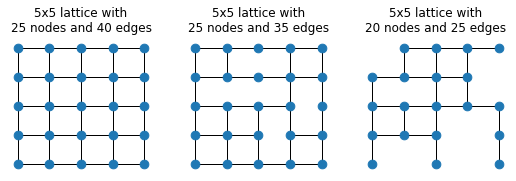

In [11]:
# make 3 5x5 lattice networks with specified numbers of nodes and edges
nodes = [25, 25, 20]
edges = [40, 35, 25]
network1 = spatial_lattice_graph(lattice=(5,5), nodes=nodes[0], edges=edges[0])
network2 = spatial_lattice_graph(lattice=(5,5), nodes=nodes[1], edges=edges[1])
network3 = spatial_lattice_graph(lattice=(5,5), nodes=nodes[2], edges=edges[2])

# make a figure
plt.figure(figsize=(9,2.5))
    
axis1 = plt.subplot(131)
plt.title('5x5 lattice with\n'+str(nodes[0])+' nodes and '+str(edges[0])+' edges')
nx.draw(network1, nx.get_node_attributes(network1, 'position'), node_size=75, axis=axis1)

axis2 = plt.subplot(132)
plt.title('5x5 lattice with\n'+str(nodes[1])+' nodes and '+str(edges[1])+' edges')
nx.draw(network2, nx.get_node_attributes(network2, 'position'), node_size=75, axis=axis2)

axis3 = plt.subplot(133)
plt.title('5x5 lattice with\n'+str(nodes[2])+' nodes and '+str(edges[2])+' edges')
nx.draw(network3, nx.get_node_attributes(network3, 'position'), node_size=75, axis=axis3)

When we do not give a value for `lattice`, `spatial_lattice_graph(nodes=n, edges=m)` generates the smallest square lattice that has `n` or more nodes and returns a subgraph of exactly `n` nodes of this square lattice.

In [21]:
# make 3 lattice networks with specified numbers of nodes and edges
nodes = [25, 19, 15]
edges = [35, 20, 20]
network1 = spatial_lattice_graph(nodes=nodes[0], edges=edges[0])
network2 = spatial_lattice_graph(nodes=nodes[1], edges=edges[1])
network3 = spatial_lattice_graph(nodes=nodes[2], edges=edges[2])

# make a figure
plt.figure(figsize=(9,2.5))
    
axis1 = plt.subplot(131)
plt.title('lattice with\n'+str(nodes[0])+' nodes and '+str(edges[0])+' edges')
nx.draw(network1, nx.get_node_attributes(network1, 'position'), node_size=75, axis=axis1)

axis2 = plt.subplot(132)
plt.title('lattice with\n'+str(nodes[1])+' nodes and '+str(edges[1])+' edges')
nx.draw(network2, nx.get_node_attributes(network2, 'position'), node_size=75, axis=axis2)

axis3 = plt.subplot(133)
plt.title('lattice with\n'+str(nodes[2])+' nodes and '+str(edges[2])+' edges')
nx.draw(network3, nx.get_node_attributes(network3, 'position'), node_size=75, axis=axis3)

## 2. Random geometric networks
In a random geometric graph, nodes have positions in some space and two nodes are connected by an edge if their (Euclidean) distance is smaller than some threshold `r`. One can decide to set `r` directly (in which case the number of edges in a network can change depending on the positions of nodes.) Alternatively, one can fix the number `m` of edges and fill the network with edges starting with the node pairs that are closest to one another - until one has added `m` edges to the network. The function `random_geometric_graph(n, m)` creates a random geometric graph with `n` nodes and `m` edges using the latter approach. By default, `random_geometric_graph` places nodes uniformly at random into a 1x1 square patch. One can adjust the size of this area by changing the value of the keyword argument `box` from its default value `(1.0,1.0)` so a different pair of numbers. To create a random geometric graph in 3 or more dimensions, change `box` to a tuple of 3 or more numbers.

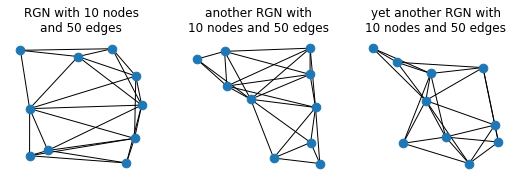

In [41]:
# set number of nodes
n = 10 

# set number of edges
m = 50 

# generate 3 random geometric networks
network1 = random_geometric_graph(n,m) 
network2 = random_geometric_graph(n,m)
network3 = random_geometric_graph(n,m)

# make a figure
plt.figure(figsize=(9,2.5))
    
axis1 = plt.subplot(131)
plt.title('RGN with '+str(n)+' nodes\nand '+str(m)+' edges')
nx.draw(network1, nx.get_node_attributes(network1, 'position'), node_size=75, axis=axis1)

axis2 = plt.subplot(132)
plt.title('another RGN with\n'+str(n)+' nodes and '+str(m)+' edges')
nx.draw(network2, nx.get_node_attributes(network2, 'position'), node_size=75, axis=axis2)

axis3 = plt.subplot(133)
plt.title('yet another RGN with\n'+str(n)+' nodes and '+str(m)+' edges')
nx.draw(network3, nx.get_node_attributes(network3, 'position'), node_size=75, axis=axis3)

## 3. Placing nests
For simulations, we will (for now) assume that there are exactly two points of interest on a network between which ants travel back and forth. We refer to these points of interest as "nests". However, these points of interest could also be food sources.

Our default simulation setup includes two nests. We place one nest on the node that is furthest to left in the spatial network (i.e., the node with the smallest horizontal coordinate) and the other nest on the node that is furthest to the right (i.e., the node with the largest horizontal coordinate). If several nodes have the smallest horizontal coordinate, we choose the one with the smallest vertical coordinate to be the left nest. If several nodes have the largest horizontal coordinate, we choose the one with the largest vertical coordinate to be the right nest. On a 2d grid, this means that we usually get one nest in the bottom left corner and one nest in the top right corner. Let's look at an example.

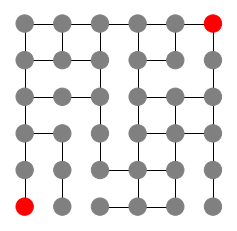

In [2]:
# construct a 6x6 lattice
g = spatial_lattice_graph(lattice=(6,6))

# create an antnetwork from g
an = AntNetwork(graph=g)

# remove 25% of the edges
an.initialize_temporal_graph(visibility=0.75)
an.update_selfedge_visibility()

# set two nests
an.set_two_nests()

# visualize
pos = {i: an.nodes[i]['position'] for i in range(an.number_of_nodes())}
plt.figure(figsize=(4,4))
axis = plt.subplot(111)
nx.draw(nx.Graph(an.get_temporal_graph()), pos, axis=axis, node_color=color_nodes(an))

In [3]:
nx.set_edge_attributes(an, {(0,1): 'x'}, 'new')

In [7]:
an[1][2]['new']

KeyError: 'new'